In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

def generate_row_combinations(row_clue, size):
    if row_clue == [0]:
        return [['_'] * size]

    results = []

    def backtrack(idx, pos, row):
        if idx == len(row_clue):
            results.append(row[:])
            return

        block_size = row_clue[idx]
        for i in range(pos, size - block_size + 1):
            # Avoid overlap with existing blocks
            if any(cell == '#' for cell in row[i:i+block_size]):
                continue
            if i > 0 and row[i - 1] != '_':
                continue
            new_row = row[:]
            new_row[i:i + block_size] = ['#'] * block_size
            if i + block_size < size:
                new_row[i + block_size] = '_'
            backtrack(idx + 1, i + block_size + 1, new_row)

    row = ['_'] * size
    backtrack(0, 0, row)
    return results

def generate_all_row_combinations(row_clues, size):
    return {i: generate_row_combinations(clue, size) for i, clue in enumerate(row_clues)}

# Build tree without pruning
def build_full_nonogram_tree(row_combinations):
    G = nx.DiGraph()
    state_id = 0
    level_states = {0: [([], "S0")]}  # starting node

    for level in range(1, len(row_combinations) + 1):
        level_states[level] = []
        for prev_grid, prev_label in level_states[level - 1]:
            for row in row_combinations[level - 1]:
                new_grid = prev_grid + [row]
                label = f"S{state_id}"
                G.add_node(label, grid=new_grid)
                G.add_edge(prev_label, label)
                level_states[level].append((new_grid, label))
                state_id += 1

    return G

def draw_branching_graph(G):
    pos = nx.spring_layout(G, seed=42, k=0.8)
    plt.figure(figsize=(14, 10))

    node_labels = {
        node: "\n".join("".join(row) for row in G.nodes[node]['grid']) 
        for node in G.nodes if G.nodes[node].get('grid')
    }

    nx.draw(G, pos, with_labels=False, arrows=True, node_color='lightgreen', node_size=1200)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)
    plt.title("Full Nonogram Expansion Tree (No Pruning)")
    plt.axis("off")
    plt.show()


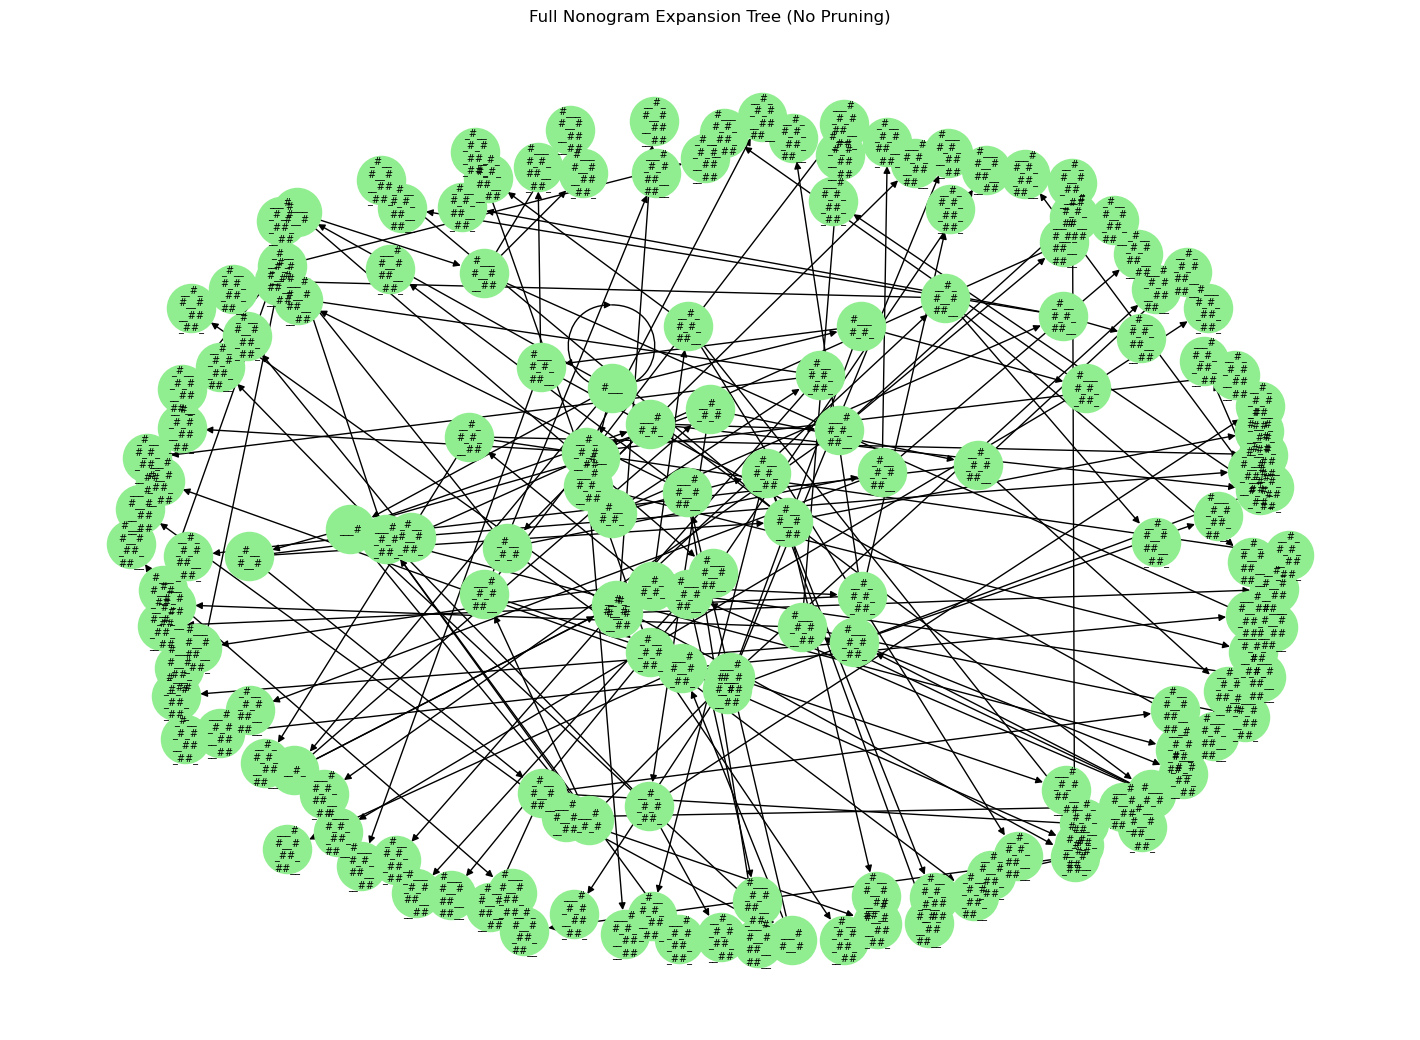

Total nodes in the graph: 160
Total edges in the graph: 160


In [3]:
column_clues = [[1], [2], [2], [2]]  # Not used here
row_clues = [[1], [1, 1], [2], [2]]
size = 4

row_combinations = generate_all_row_combinations(row_clues, size)
G = build_full_nonogram_tree(row_combinations)
draw_branching_graph(G)

# Count nodes and edges
print(f"Total nodes in the graph: {len(G.nodes)}")
print(f"Total edges in the graph: {len(G.edges)}")


Total nodes in the graph: 161
Total edges in the graph: 160


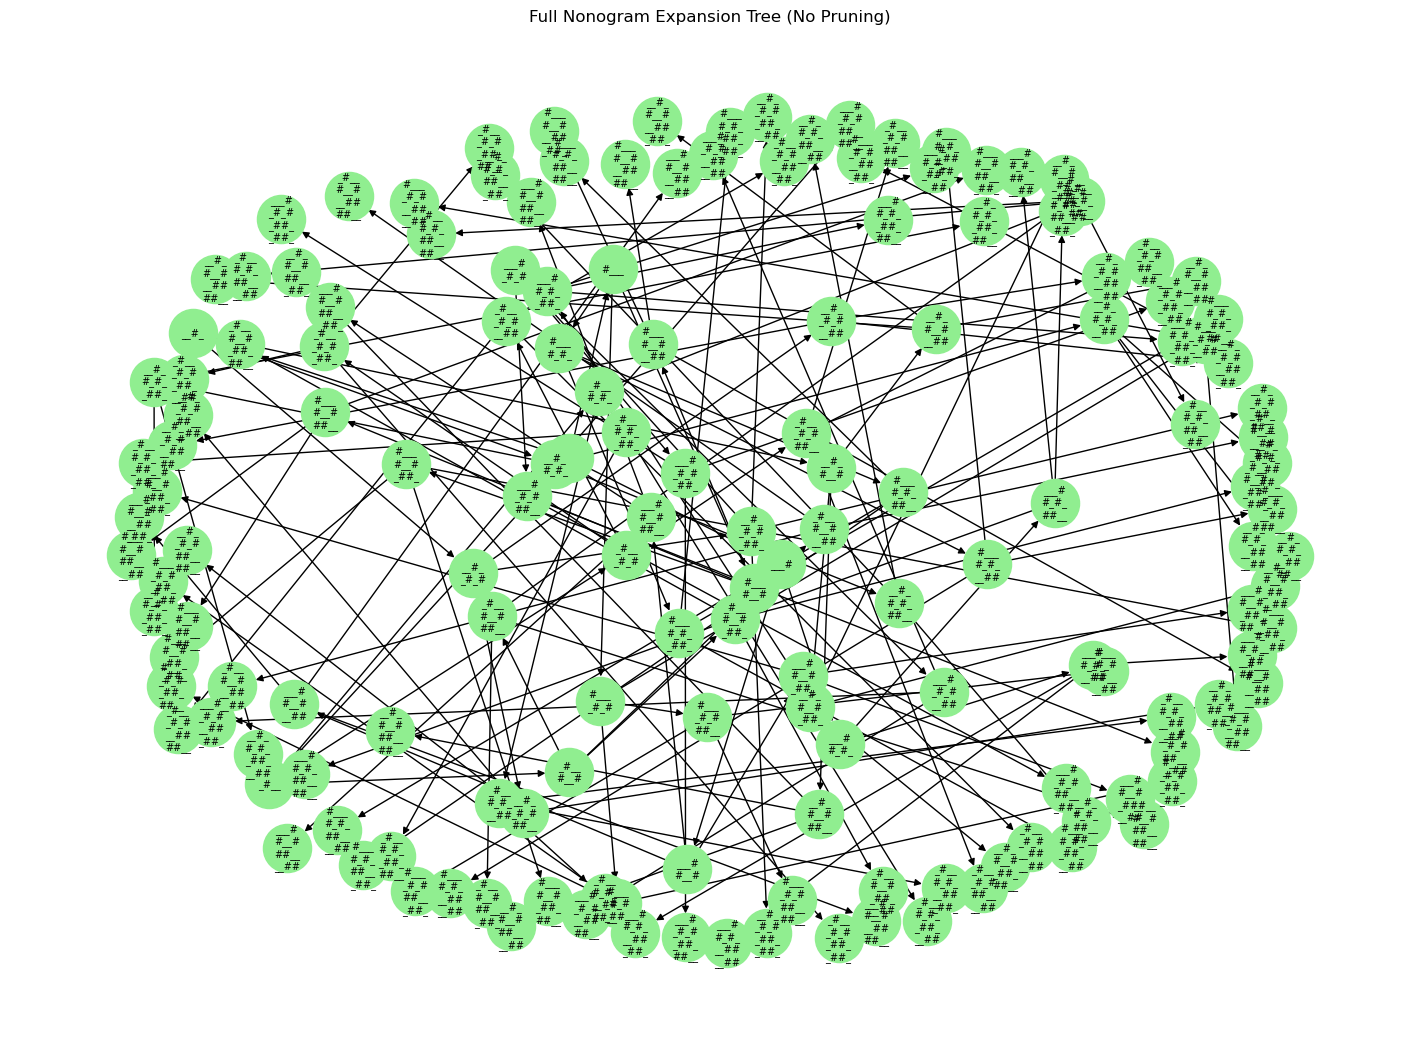

Total nodes in the graph: 161
Total edges in the graph: 160


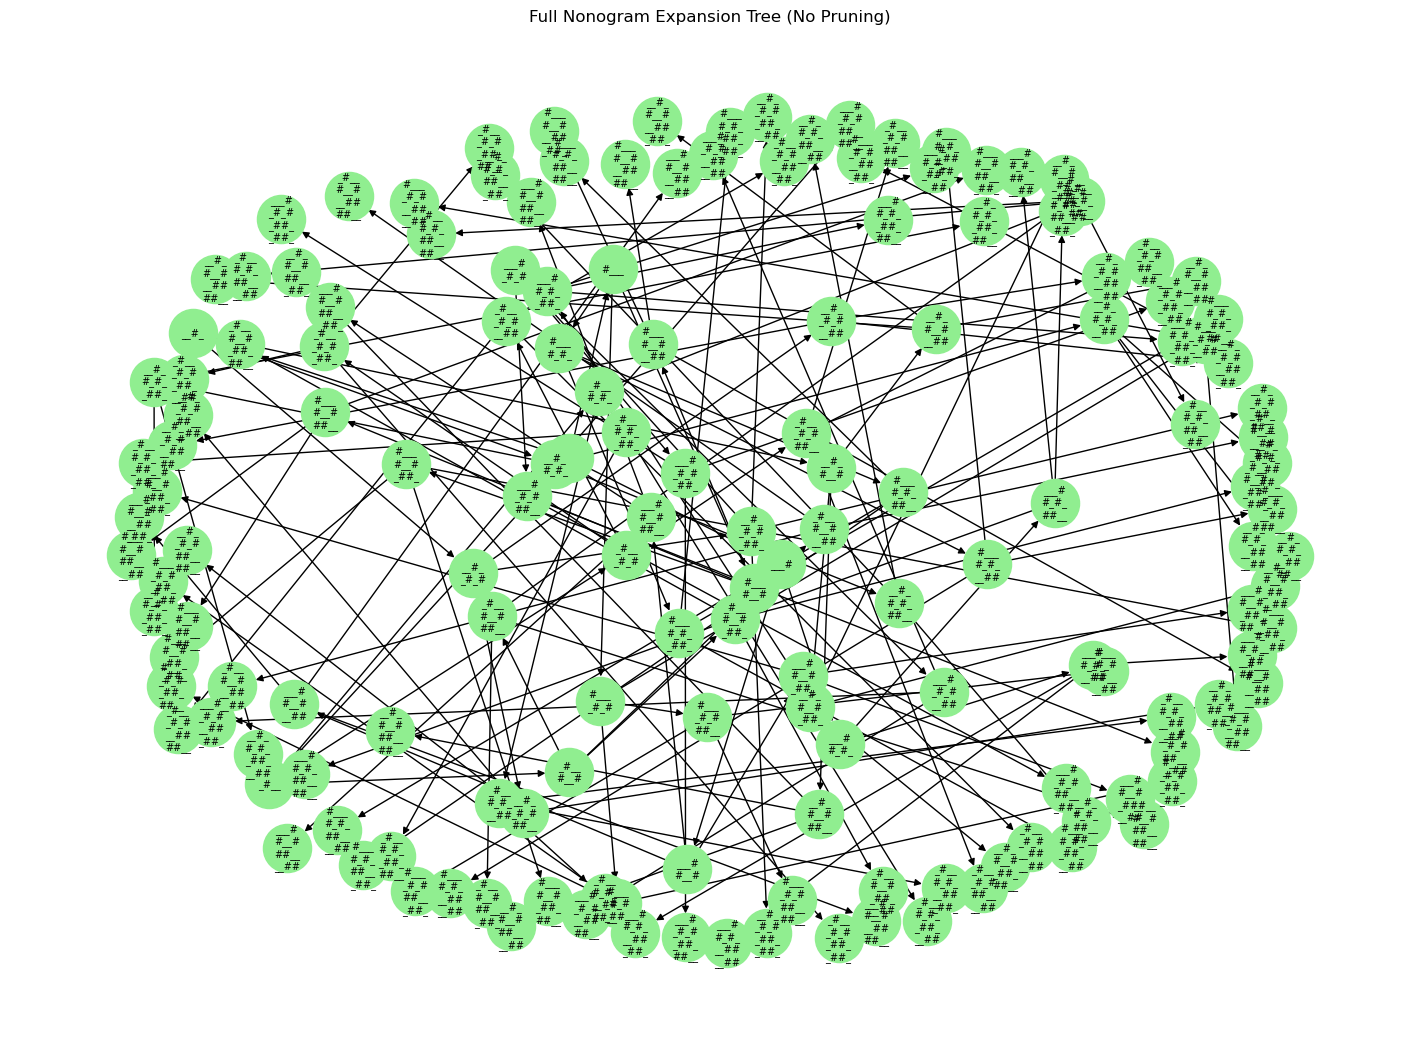

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

def generate_row_combinations(row_clue, size):
    if row_clue == [0]:
        return [['_'] * size]

    results = []

    def backtrack(idx, pos, row):
        if idx == len(row_clue):
            results.append(row[:])
            return

        block_size = row_clue[idx]
        for i in range(pos, size - block_size + 1):
            # Avoid overlap with existing blocks
            if any(cell == '#' for cell in row[i:i+block_size]):
                continue
            if i > 0 and row[i - 1] != '_':
                continue
            new_row = row[:]
            new_row[i:i + block_size] = ['#'] * block_size
            if i + block_size < size:
                new_row[i + block_size] = '_'
            backtrack(idx + 1, i + block_size + 1, new_row)

    row = ['_'] * size
    backtrack(0, 0, row)
    return results

def generate_all_row_combinations(row_clues, size):
    return {i: generate_row_combinations(clue, size) for i, clue in enumerate(row_clues)}

# Build tree without pruning
def build_full_nonogram_tree(row_combinations):
    G = nx.DiGraph()
    level_states = {0: [([], "S0")]}  # starting node
    visited = set()  # To track unique grid states

    for level in range(1, len(row_combinations) + 1):
        level_states[level] = []
        for prev_grid, prev_label in level_states[level - 1]:
            for row in row_combinations[level - 1]:
                new_grid = prev_grid + [row]
                grid_tuple = tuple(tuple(row) for row in new_grid)  # Convert grid to a hashable tuple

                # Skip if this grid has already been visited
                if grid_tuple in visited:
                    continue

                # Mark this grid as visited
                visited.add(grid_tuple)

                # Add node and edge
                label = f"S{len(visited)}"  # Unique node label based on the visited set size
                G.add_node(label, grid=new_grid)
                G.add_edge(prev_label, label)
                level_states[level].append((new_grid, label))

    return G

def draw_branching_graph(G):
    pos = nx.spring_layout(G, seed=42, k=0.8)
    plt.figure(figsize=(14, 10))

    node_labels = {
        node: "\n".join("".join(row) for row in G.nodes[node]['grid']) 
        for node in G.nodes if G.nodes[node].get('grid')
    }

    nx.draw(G, pos, with_labels=False, arrows=True, node_color='lightgreen', node_size=1200)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)
    plt.title("Full Nonogram Expansion Tree (No Pruning)")
    plt.axis("off")
    plt.show()

# Example usage
row_clues = [[1], [1, 1], [2], [2]]  # Example row clues
size = 4  # Grid size
row_combinations = generate_all_row_combinations(row_clues, size)

G = build_full_nonogram_tree(row_combinations)
print(f"Total nodes in the graph: {len(G.nodes)}")
print(f"Total edges in the graph: {len(G.edges)}")
draw_branching_graph(G)
